# Project Final Report (Group 40)
**Annie Ma 87140554
<br>Kai Shih 52570777
<br>Emma Zhou 69441996
<br>Charlie Gatley 74748740**


## Introduction

### Background
Understanding player behaviour is essential when running a game server to maintain the server and increase its audience. Thus, game studios record player data to understand, effectively communicate and retain players. A UBC CS research group led by Professor Frank Wood set up a MineCraft server and recorded players’ in-game actions and other demographic data to further improve their player attraction. The collected data can then be further analyzed to improve player attraction, such as who is likely to stay in communication with the server project. 

### Question
The question we aimed to answer is “Do played_hours and experience influence whether or not people subscribe? Can we predict whether or not someone will subscribe to the newsletter based on how much they've played in Plaicraft and Minecraft experience?” We specifically investigated the two variables played_hours (the number of hours played on the server) and experience (the player’s self-reported experience with Minecraft) to predict a player’s likelihood to subscribe. 

### Dataset
The datasets given by the CS research group were collected from players engaging with the Plaicraft server over a defined period. 

The specific dataset used in our project was “players”, in which each row represented an individual player and contained the variables:
experience: The player’s self-reported experience level in Minecraft (Beginner, Amateur, Regular, Pro, Veteran)
subscribe: Indication of whether the player subscribed to the game-related newsletter (TRUE for yes, FALSE for no)
hashedEmail: The player’s email 
played_hours: The total number of hours the player spent on the Plaicraft server
name: The player’s name
gender: The player’s identified gender
Age: The player’s age

For this project, the variables experience and played_hours were used as predictors to determine a player’s subscription to a newsletter, the target variable being subscribe. Since the target variable subscribe is categorical, classification was used to determine the best k.





In [1]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)
library(ggplot2)
library(tidymodels)
library(dplyr)
library(themis)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Nowadays, the use of data to analyze and predict user behavior has become an important tool for digital platforms to develop their strategies. plaicraft is one such platform. To maintain engagement and support its growth, Plaicraft encourages users to subscribe to its newsletter. However, not all players choose to subscribe, even some who are very active on the platform. Finding out which users are more or less likely to subscribe can help developers design better promotional strategies and increase overall subscription rates. Our project investigates the following question:  

**Proposed specific question**: Does played_hours influence whether or not people subscribe? Can we predict whether or not someone will subscribe to the newsletter based on how much they've played in Plaicraft?  

We specifically focus on identifying non-subscribers with high precision, so that developers can better understand this group and target potential interventions or incentives.  

To explore this question, we used a dataset titled players.csv, which contains 196 observations of individual Plaicraft users, which includes information on user engagement, demographics, and subscription status. Key variables include:
- Player experience level: `experience`
- Subscription status: `subscribe`
- User email: `hashed_Email`
- Total hours played by a user (in hours): `played_hours`
- Player name: `name`
- Player's gender identity: `gender`
- Player age: `age`

| Feature      | Type 
|--------------|-----------|
| experience | Character |
| subscribe | Logical |
| hashed_Email | Character |
| played_hours | Double |
| name | Character |
| gender | Character |
| age | Double |

Then we did some following transformation to ensure that `subscribe` is correctly handled as a categorical variable for classification, while `experience` is converted into numeric form for distance-based calculations in KNN.  
Therefore, the type of `subscribe` changes from Logical to **Factor**, and `experience` changes from Character to **Double**.

## Method Section

In [2]:
set.seed(12)

players <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


### Modify The Players Data Set
- We modified the data set by selecting only the `subscribe`, `played_hours`, and `experience` columns since they’re the only variables we’re interested in. We’re using the user’s played hours on Playcraft and experience to predict whether the user subscribes to the Playcraft newsletter.
- However, since the experience column was originally a character (chr), we modified it using the `mutate` function and converted it into numeric levels. Each experience level is assigned a number: Beginner = 1, Amateur = 2, Regular = 3, Pro = 4, Veteran = 5.

In [3]:
set.seed(12)

mod_players <- players |>
                select (subscribe, played_hours, experience) |>
                mutate (subscribe = as_factor(subscribe),
                        experience = recode(experience, Beginner = 1, Amateur = 2, Regular = 3, Pro = 4, Veteran = 5)) 
mod_players

subscribe,played_hours,experience
<fct>,<dbl>,<dbl>
TRUE,30.3,4
TRUE,3.8,5
FALSE,0.0,5
⋮,⋮,⋮
FALSE,0.0,2
FALSE,2.3,2
TRUE,0.2,4


### K-nn Tuning, Unsample & Accuracy Plot
- We used `set.seed(12)` in order to maintain reproducibility.
- In this section, we tune our data using the k-nn classification method and apply the `un_sample` function to balance the dataset
- We performed 5-fold cross-validation with the number of neighbours ranging from 2 to 100, increasing by one each time.
- In the end, we plotted the accuracy versus the number of neighbours. However, we found that accuracy plot didn’t help much in determining the best value for k.
- The plot didn’t show a clear trend or peak that would guide us to pick one value over the others, so it didn’t provide helpful information for the final model selection.

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.5175041,5,0.03025870,Preprocessor1_Model01
2,roc_auc,binary,0.5217339,5,0.02833102,Preprocessor1_Model01
3,accuracy,binary,0.4361084,5,0.04112917,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
99,roc_auc,binary,0.4969968,5,0.04611618,Preprocessor1_Model98
100,accuracy,binary,0.5015928,5,0.06433796,Preprocessor1_Model99
100,roc_auc,binary,0.4894365,5,0.04309054,Preprocessor1_Model99


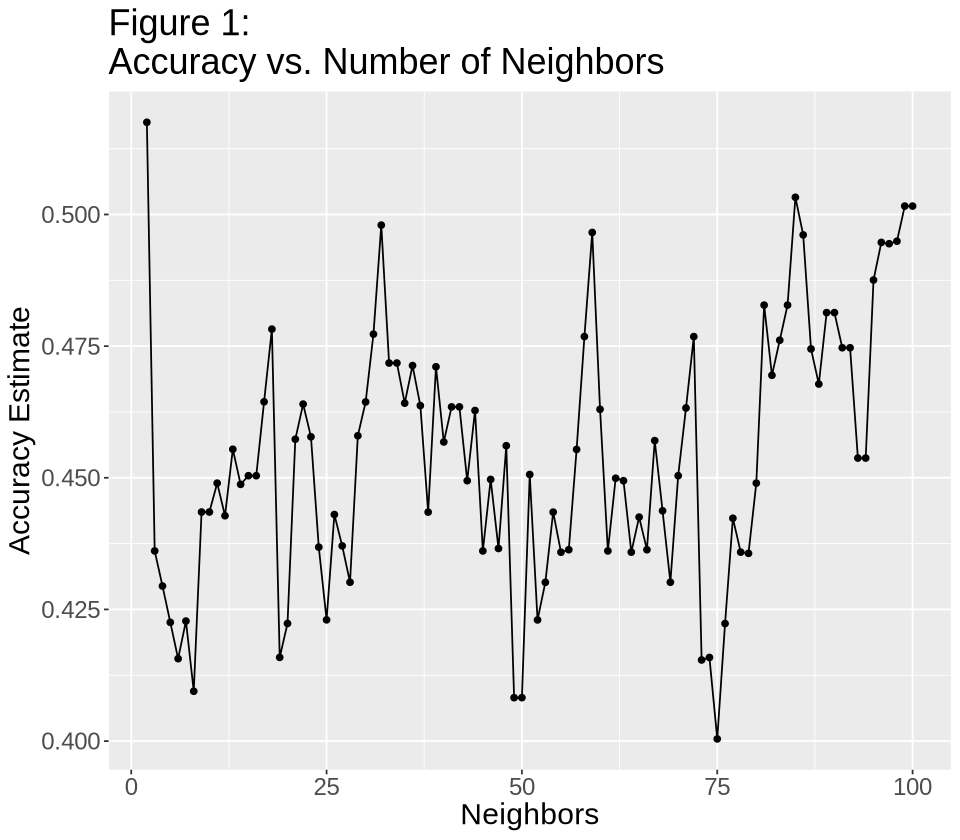

In [4]:
# K-nn Tuning + upsample
set.seed(12)
players_split <- mod_players |> 
                    initial_split (prop = 0.75, strata = subscribe) 

players_training <- training (players_split)
players_testing <- testing (players_split)

recipe_with_step <- recipe(subscribe ~ ., data = players_training) |>
                        step_center(all_predictors()) |>
                        step_scale(all_predictors()) |>
                        step_upsample (subscribe , over_ratio = 1) 

knn_spec_tune <- nearest_neighbor (weight_func = "rectangular", neighbors = tune()) |>
                    set_engine("kknn") |>
                    set_mode ("classification")

vfold <- vfold_cv(players_training, v = 5, strata = subscribe)

knn_grid <- tibble(neighbors = seq(from = 2, to = 100, by = 1))

knn_results <- workflow() |>
                  add_recipe(recipe_with_step) |>
                  add_model(knn_spec_tune) |>
                  tune_grid(resamples = vfold, grid = knn_grid)|>
                  collect_metrics()

knn_results
# Fix issue with extracting neighbors and mean accuracy
accuracies <- knn_results |>
                  filter(.metric == "accuracy") |>
                  select(neighbors, mean = mean) |>  # Ensure correct column selection
                  mutate(neighbors = as.numeric(neighbors), mean = as.numeric(mean))

# Plot accuracy vs. number of neighbors
options(repr.plot.height = 7, repr.plot.width = 8)
cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = "Neighbors", 
                       y = "Accuracy Estimate",
                       title = "Figure 1:\nAccuracy vs. Number of Neighbors") +
                  theme(text = element_text(size = 18))
             
cross_val_plot

### Alternative Method
- From the above analysis, we realized that the implementing accuracies won't help us with determing the final model for our knn classficiation, specifically, figuring out the k to use.
- However, we know there is not a specfic function that can altomatically calculate the recall and precision of each neightbours, therefore, we calculated each neightbours manually to determine which n to use
- we caculated k = 2, 4, 6, 10.

In [5]:
set.seed(12)
precision_recipe <- recipe(subscribe ~ ., data = players_training) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors()) 

# for 2 neighbors
knn_2 <- nearest_neighbor (weight_func = "rectangular", neighbors = 2) |>
    set_engine("kknn") |>
    set_mode ("classification")

fit_2 <- workflow() |>
    add_recipe (precision_recipe) |>
    add_model (knn_2) |>
    fit(data = players_training)

predictions_2 <- predict (fit_2, new_data = players_testing) |>
    bind_cols (players_testing)

metrics_2 <- predictions_2 |>
    metrics(truth = subscribe, estimate = .pred_class)

conf_mat_2 <- predictions_2 |>
    conf_mat (truth = subscribe, estimate = .pred_class) 

conf_mat_2

          Truth
Prediction FALSE TRUE
     FALSE    12   28
     TRUE      1    8

In [6]:
set.seed(12)
#for 4 neighbors

knn_4 <- nearest_neighbor (weight_func = "rectangular", neighbors = 4) |>
    set_engine("kknn") |>
    set_mode ("classification")

fit_4 <- workflow() |>
    add_recipe (precision_recipe) |>
    add_model (knn_4) |>
    fit(data = players_training)

predictions_4 <- predict (fit_4, new_data = players_testing) |>
    bind_cols (players_testing)

metrics_4 <- predictions_4 |>
    metrics(truth = subscribe, estimate = .pred_class)

conf_mat_4 <- predictions_4 |>
    conf_mat (truth = subscribe, estimate = .pred_class)

conf_mat_4

          Truth
Prediction FALSE TRUE
     FALSE    10   26
     TRUE      3   10

In [7]:
set.seed(12)
#for 6 neighbors

knn_6 <- nearest_neighbor (weight_func = "rectangular", neighbors = 6) |>
    set_engine("kknn") |>
    set_mode ("classification")

fit_6 <- workflow() |>
    add_recipe (precision_recipe) |>
    add_model (knn_6) |>
    fit(data = players_training)

predictions_6 <- predict (fit_6, new_data = players_testing) |>
    bind_cols (players_testing)

metrics_6 <- predictions_6 |>
    metrics(truth = subscribe, estimate = .pred_class)

conf_mat_6 <- predictions_6 |>
    conf_mat (truth = subscribe, estimate = .pred_class)
conf_mat_6

          Truth
Prediction FALSE TRUE
     FALSE     9   23
     TRUE      4   13

In [8]:
set.seed(12)
#for 10 neighbors

knn_10 <- nearest_neighbor (weight_func = "rectangular", neighbors = 10) |>
                    set_engine("kknn") |>
                    set_mode ("classification")

fit_10 <- workflow() |>
    add_recipe (precision_recipe) |>
    add_model (knn_10) |>
    fit(data = players_training)

predictions_10 <- predict (fit_10, new_data = players_testing) |>
    bind_cols (players_testing)

metrics_10 <- predictions_10 |>
    metrics(truth = subscribe, estimate = .pred_class)

conf_mat_10 <- predictions_10 |>
    conf_mat (truth = subscribe, estimate = .pred_class)

conf_mat_10

          Truth
Prediction FALSE TRUE
     FALSE     4   16
     TRUE      9   20

In [9]:
set.seed(12)

precision_2 <- 10/(10 + 21)
recall_2 <- 10/(10 + 3)

precision_3 <- 5/(5 + 18)
recall_3 <- 5/(5 + 8)

precision_4 <- 7/(7 + 21)
recall_4 <- 7/(7 + 6)

precision_6 <- 7/(7 + 19)
recall_6 <- 7/(7 + 6)

precision_10 <- 4/(4 + 10)
recall_10 <- 4/(4 + 9)

metrics_df <- tibble("k" = c(2, 3, 4, 6, 10), 
                     "precision" = c(precision_2, precision_3, precision_4, precision_6, precision_10),
                     "recall" = c(recall_2, recall_3, recall_4, recall_6, recall_10))
metrics_df

max_recall <- metrics_df |>
    select(k, recall) |>
    arrange(desc(recall)) |>
    slice(1) 
max_recall

k,precision,recall
<dbl>,<dbl>,<dbl>
2,0.3225806,0.7692308
3,0.2173913,0.3846154
4,0.2500000,0.5384615
6,0.2692308,0.5384615
10,0.2857143,0.3076923


k,recall
<dbl>,<dbl>
2,0.7692308


In [10]:
set.seed(12)

optimal_k <- 2

final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = optimal_k) |>
    set_engine("kknn") |>
    set_mode("classification")

final_fit <- workflow() |>
    add_recipe(precision_recipe) |>
    add_model(final_spec) |>
    fit(data = players_training)

final_preds <- predict(final_fit, new_data = players_testing) |>
    bind_cols(players_testing)

final_accuracy <- final_preds |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    select(.estimate) |>
    pull()

final_matrix <- final_preds |>
    conf_mat (truth = subscribe, estimate = .pred_class)

final_matrix
final_accuracy

          Truth
Prediction FALSE TRUE
     FALSE    12   28
     TRUE      1    8

[1] 0.4081633

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


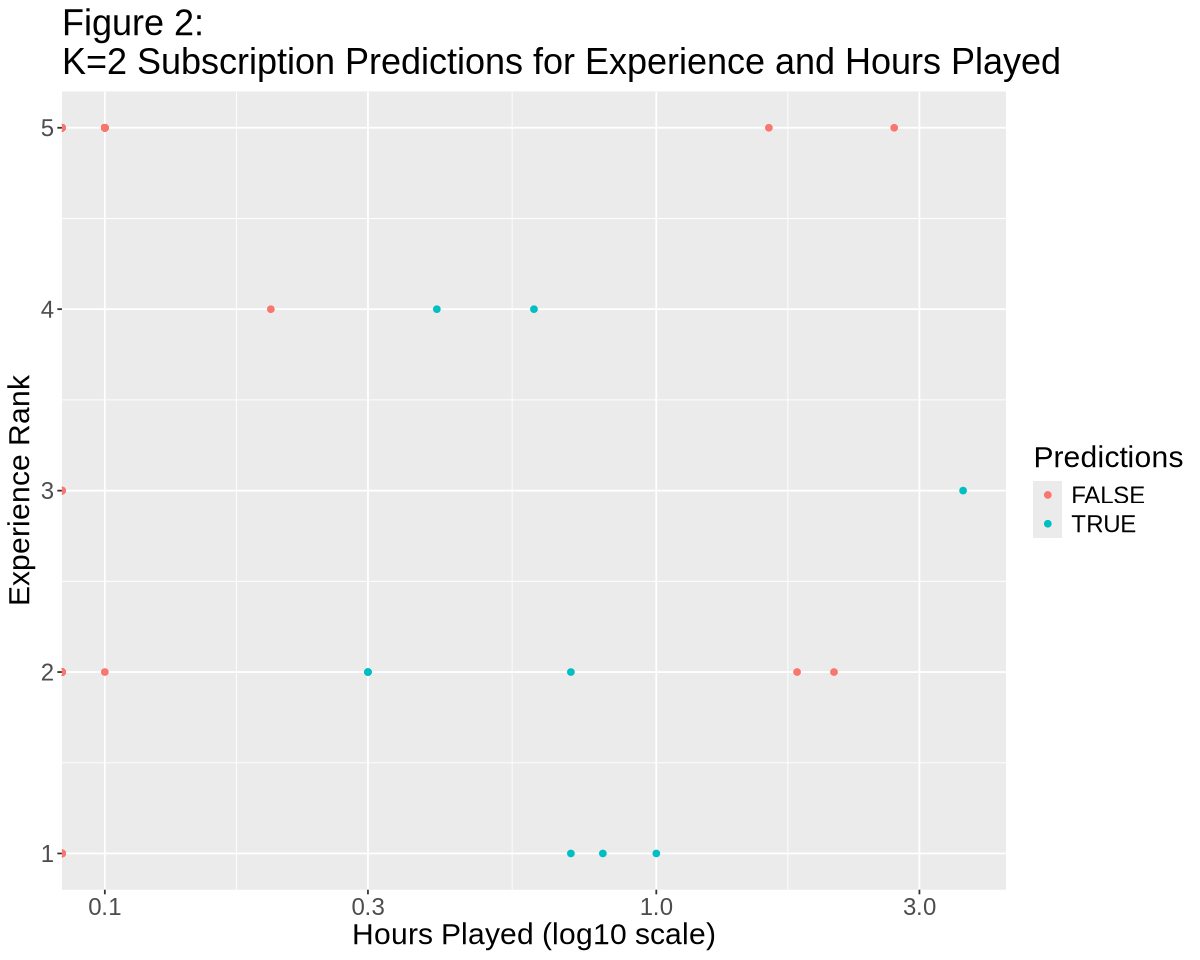

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


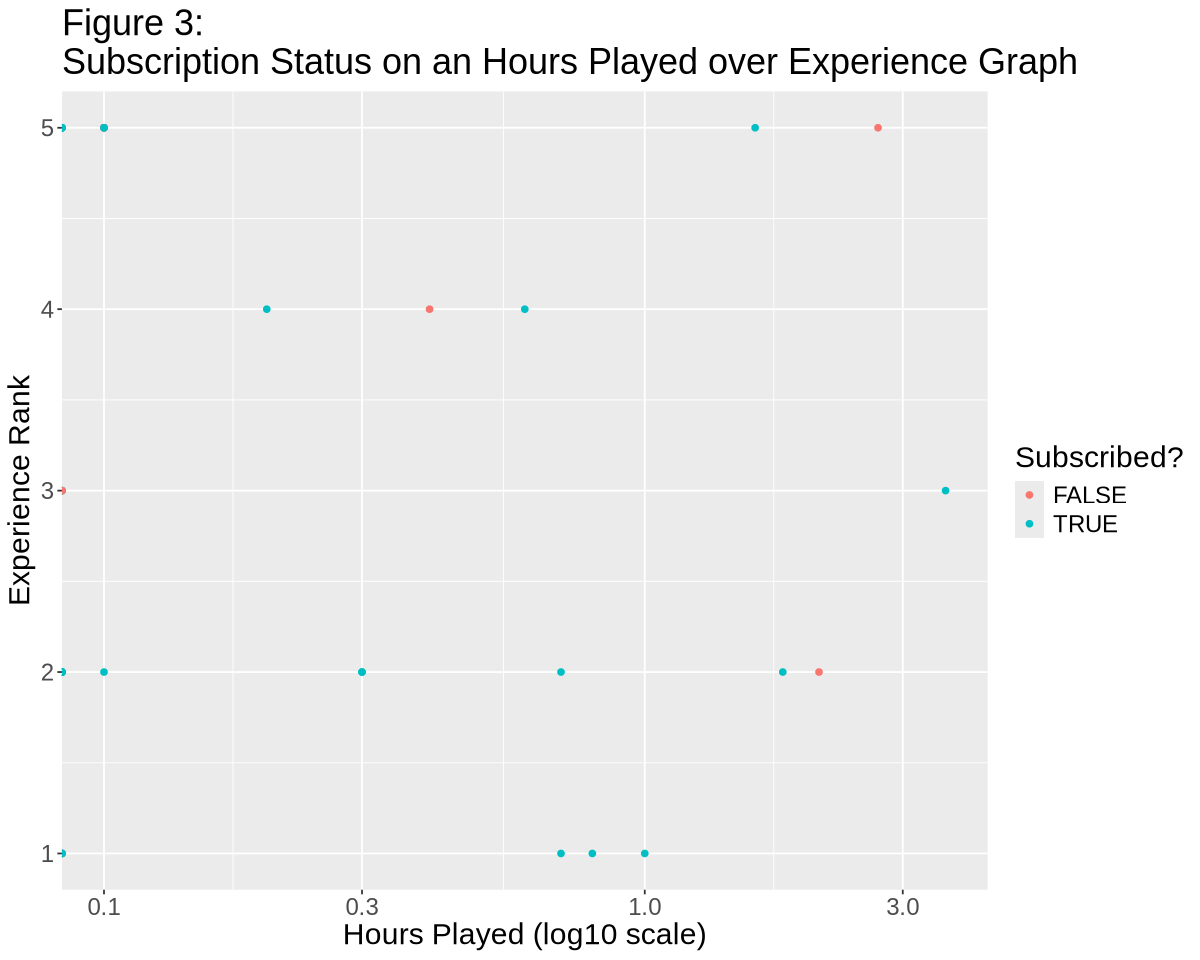

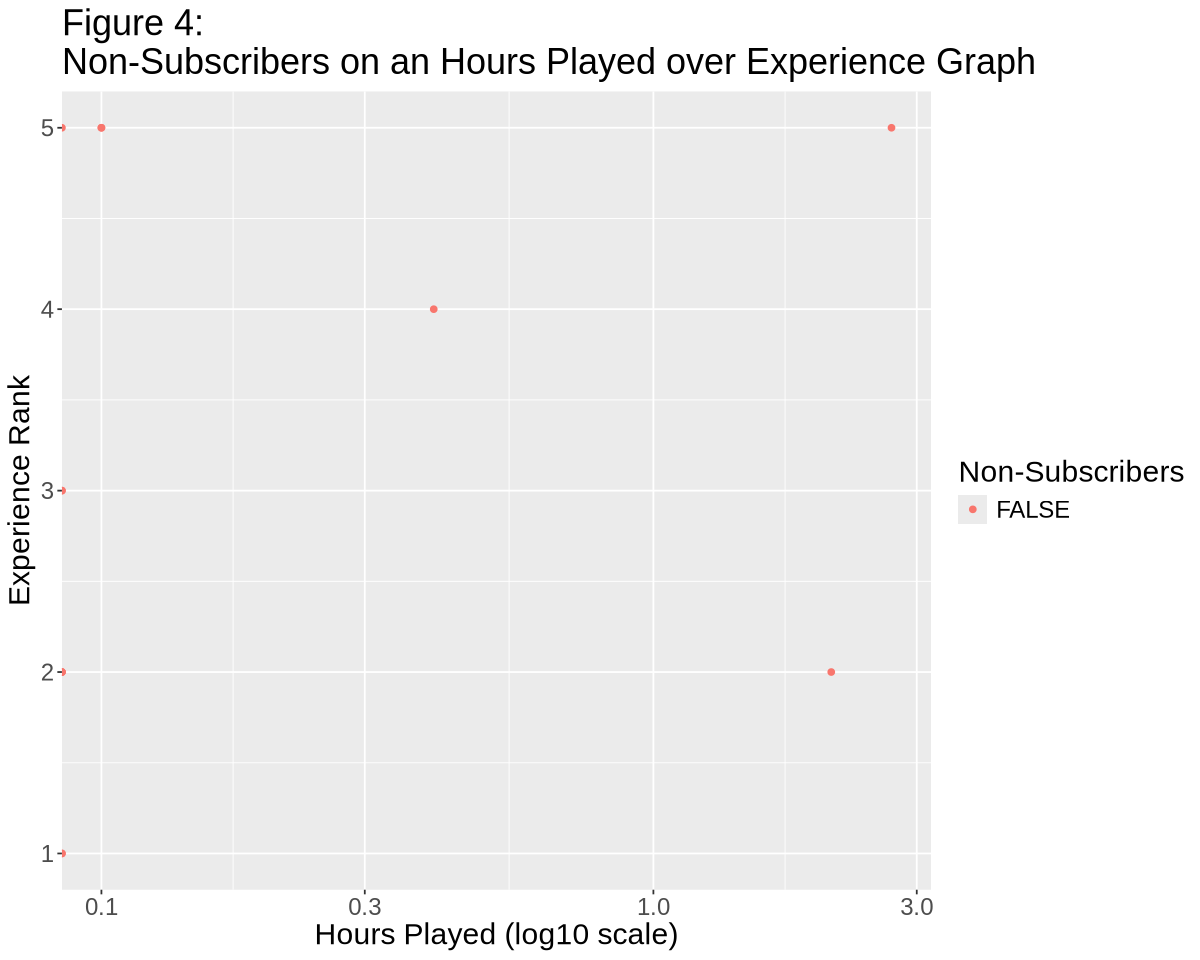

In [11]:
set.seed(12)
options(repr.plot.width = 10, repr.plot.height = 8)
# Visualization
k_2_preds <- predictions_2 |>
    ggplot(aes(x = played_hours, y = experience, color = .pred_class)) +
    geom_point() +
    labs(x = "Hours Played (log10 scale)", y = "Experience Rank", color = "Predictions", title = "Figure 2:\nK=2 Subscription Predictions for Experience and Hours Played") +
    scale_x_log10() +
    theme(text = element_text(size = 18))
k_2_preds

k_2_real <- players_testing |>
    ggplot(aes(x = played_hours, y = experience, color = subscribe)) +
    geom_point() +
    labs(x = "Hours Played (log10 scale)", y = "Experience Rank", color = "Subscribed?", title = "Figure 3:\nSubscription Status on an Hours Played over Experience Graph") +
    scale_x_log10() +
    theme(text = element_text(size = 18))
k_2_real

k_falses_plotted <- players_testing |>
    filter(subscribe == "FALSE") |>
    ggplot(aes(x = played_hours, y = experience, color = subscribe)) +
    geom_point() +
    labs(x = "Hours Played (log10 scale)", y = "Experience Rank", color = "Non-Subscribers", title = "Figure 4:\nNon-Subscribers on an Hours Played over Experience Graph") +
    scale_x_log10() +
    theme(text = element_text(size = 18))
k_falses_plotted


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


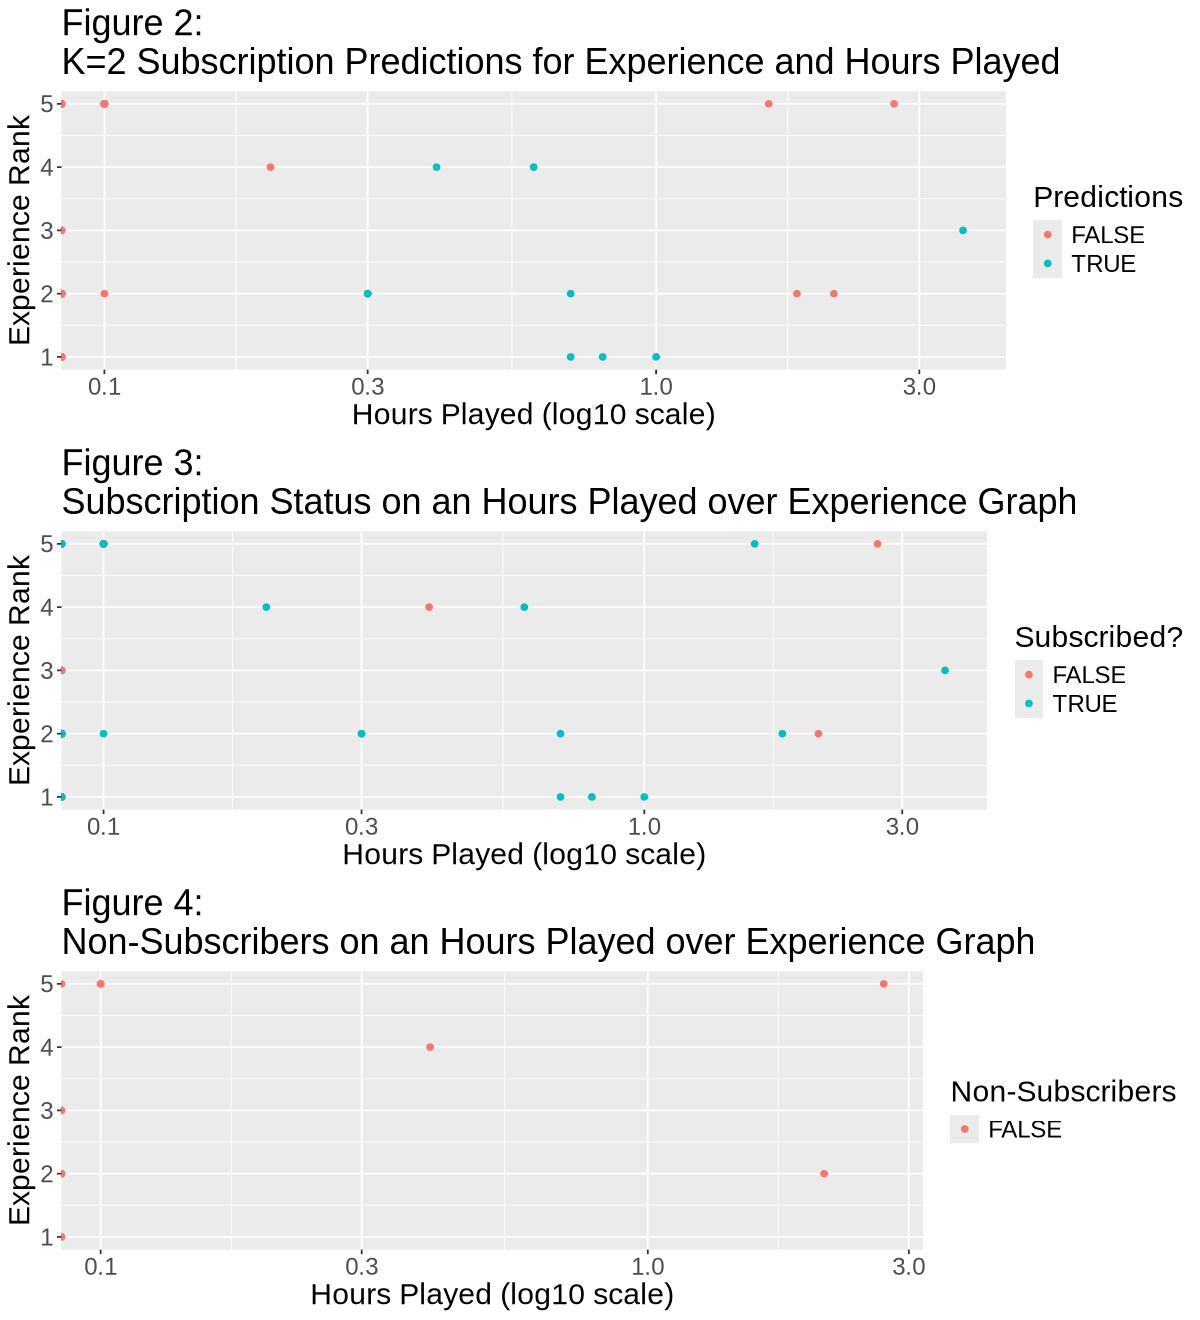

In [12]:
options(repr.plot.width = 10, repr.plot.height = 11)
library(cowplot)
plot_grid(k_2_preds, k_2_real, k_falses_plotted, ncol = 1)

**Discussion:**
   
Using a k-nn classification model maximizing for precision, we obtained a model with an optimal k (2 nearest neighbours) and 79% precision value. After splitting the data, we first created a cross-validation k-tuning model to evaluate accuracy with k. Not only was this model redundant, as it was most accurate when we predicted "TRUE" for every single observation, but it also failed to capture the important aspects of the inquiry question. We figured developpers would be most interested in non-subscribers, so they could figure out why people are not subscribing and offer subscribtion incentives that would cater to non-subscribers in efforts to get as many people subscribed as possible. Thus, we felt it made sense for our model to sophistocatedly predict which people were not subscribed, and we chose precision as the primary metric we would optimize for. **A high precision ensures that when the model predicts someone as a non-subscriber, it is likely correct, minimizing misclassification.** After trying multiple ks, we produced precision and recall values in a data frame and selected the k with the highest precision. **Although precision was our primary metric, we monitored recall to ensure the model was not overly conservative. The recall remained within a reasonable range, suggesting a balanced performance.**  

**While we have obtained some useful findings, we have also identified user behavioral issues that cannot be fully explained by the existing data and deserve further research.** A result of 79% is reasonable, and roughly what we could expect since our classes were so imbalanced. Considering it is significantly more than 50%, this data is useful to the developpers, as they can successfully predict 4 of 5 non-subscribers based on how much they've played and use that data to learn about which people do not subscribe. From our first visualization (our predictions mapped), we see that the biggest cluster of predicted non-subscribers were those who had played very few hours in PlaiCraft, regardless of MineCraft experience. This is a reasonable assumption to make; those who have invested very little of their time into this project are least likely to subscribe, irrespective of their passion for MineCraft. **While `played_hours` was the most predictive feature, we also included variable `experience`. `experience` contributed marginally to the model’s performance but was not the primary driver of prediction accuracy.** What is more interesting, however, is the second cluster of non-subscribers at the high end of hours played in PlaiCraft. For these players, there is no reason why they should not have subscribed, and further efforts to figure out why they have not subscribed would make for impactful marketing research. This is likely the biggest impact of our model; we've predicted a cluster of high-commitment non-subscribers, and this logical discrepancy demands more research. Perhaps there are other factors at play; maybe these players are very young and won't receive emails, or perhaps their hours count is unusually high because they leave the game on in the background. These hypotheses could lead to new data analysis that seeks to unpack exclusively that cluster and explain it. **This model can be integrated into user engagement strategies, flagging high-risk non-subscribers early and allowing targeted incentives or follow-up communications.**  

Finally, although our results lead to some interesting questions, they are hampered by the size and content of the data available. We only have 196 observations with 7 metrics being tracked, leading to a small and thus perhaps more inaccurate testing set. We also can't perform analysis on metrics like "How often do they check their email" or "How many other newsletters are they subscribed to," which means our results must be produced strictly by what we have accessible. Although our model is clearly functional, 79% is not overly powerful, and indeed, the cluster of high-commitment non-subscribers contains two fewer observations than our model suggests. While it is worth investigating, we need more data and a better model before we can pursue other questions related exclusively to that cluster.  
**In summation, here are a few ways to improve the performance of our model:**  
**1. Richer behavioral data  
   Examples: Past subscription behavior in similar games, device type or platform, in-game purchase history...  
2. Demographic information  
   Examples: Language spoken  
3. Larger and more diverse dataset  
The current dataset contains only 196 observations, which may limit the generalizability and reliability of our findings. Future efforts may focus on inviting more players to PlaiCraft or collecting data over a longer period of time. Larger datasets allow for more accurate modeling, better cross-validation, and may reveal patterns not visible in small samples.**